In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("C:/Users/ddoniken/Downloads/CC_GENERAL.csv")

In [3]:
print(data.shape)
data.head()

(8950, 18)


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [6]:
data.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [7]:
data['MINIMUM_PAYMENTS'] = data['MINIMUM_PAYMENTS'].fillna(data['MINIMUM_PAYMENTS'].median())
data['CREDIT_LIMIT'] = data['CREDIT_LIMIT'].fillna(data['CREDIT_LIMIT'].median())

In [8]:
data.isna().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [9]:
data = data.drop(['CUST_ID'],axis=1)

In [10]:
sc = StandardScaler()
sc.fit(data)
data_sc_df = pd.DataFrame(sc.transform(data),columns=data.columns)

In [11]:
data_sc_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960378,-0.528979,-0.302400,-0.525551,0.360680
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688678,0.818642,0.097500,0.234227,0.360680
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826100,-0.383805,-0.093293,-0.525551,0.360680
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826100,-0.598688,-0.228307,-0.525551,0.360680
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905410,-0.364368,-0.257266,-0.525551,0.360680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,-0.737950,0.518084,-0.333293,-0.356934,-0.132643,-0.466786,1.269843,-0.678661,1.179833,-0.675349,-0.476070,-0.350408,-0.960378,-0.486217,-0.341250,1.183951,-4.122768
8946,-0.742423,0.518084,-0.329136,-0.356934,-0.122823,-0.466786,1.269843,-0.678661,1.179833,-0.675349,-0.476070,-0.350408,-0.960378,-0.503396,-0.228307,-0.525551,-4.122768
8947,-0.740398,-0.185477,-0.401965,-0.356934,-0.294893,-0.466786,0.854576,-0.678661,0.760469,-0.675349,-0.476070,-0.390639,-0.960378,-0.570615,-0.326875,0.329200,-4.122768
8948,-0.745174,-0.185477,-0.469552,-0.356934,-0.454576,-0.449352,-1.221758,-0.678661,-0.916995,0.157527,-0.182998,-0.591796,-1.097800,-0.580536,-0.338305,0.329200,-4.122768


In [12]:
#K-Means Clustering
# Default mode K=8
kmeans = KMeans()
kmeans.fit(data_sc_df)
print(kmeans.labels_)
print(kmeans.cluster_centers_)
#Print Silhouette measure
print(silhouette_score(data_sc_df, kmeans.labels_))
print(data_sc_df.shape)

[6 2 3 ... 7 7 7]
[[ 1.37449127e+00  4.12070299e-01  7.17749253e+00  6.38420216e+00
   5.23954467e+00  1.60504185e-02  1.08245404e+00  1.91751189e+00
   1.03176877e+00 -2.90144496e-01 -1.07898325e-01  4.78662783e+00
   2.18107488e+00  4.96236380e+00  7.16644097e-01  8.64672739e-01
   3.32658000e-01]
 [-3.78713488e-01  3.29832674e-01 -4.16943507e-02 -2.32641276e-01
   3.28651479e-01 -3.67299340e-01  9.79756250e-01 -3.51324200e-01
   1.17020687e+00 -4.76724872e-01 -3.62041376e-01  1.66939384e-01
  -2.76371282e-01 -2.23783873e-01 -8.95429552e-02  3.14045048e-01
   2.51882992e-01]
 [ 1.63067291e+00  3.93312629e-01 -2.05032341e-01 -1.49136245e-01
  -2.10891676e-01  1.98535936e+00 -4.59743096e-01 -1.87082743e-01
  -4.08649747e-01  1.92201860e+00  1.92027115e+00 -2.40540423e-01
   9.95922424e-01  8.28048925e-01  3.89920803e-01 -3.89399454e-01
   7.10511778e-02]
 [ 1.41110988e-01  4.30968857e-01  9.53310997e-01  9.01421067e-01
   5.97999796e-01 -3.08142662e-01  1.09795882e+00  1.87329338e+00
 

In [13]:
sse = []
silhouette_coefficients = []
for k in range(2, 11):
  kmeans = KMeans(n_clusters=k, random_state=13)
  kmeans.fit(data_sc_df)
  silhouette_coefficients.append(silhouette_score(data_sc_df, kmeans.labels_))
  sse.append(kmeans.inertia_)

In [14]:
k_scores = pd.DataFrame(list(zip(range(2,11), sse, silhouette_coefficients)),columns=['k', 'sse','silhouette_coefficients'])
k_scores

,k,sse,silhouette_coefficients
0,2,127784.839617,0.210317
1,3,111973.654046,0.250500
2,4,99062.441080,0.197979
3,5,91491.112532,0.193252
4,6,84826.466271,0.202691
5,7,79506.846523,0.215349
6,8,74599.573791,0.222262
7,9,69936.079073,0.226059
8,10,66466.423744,0.220447


In [15]:
# clusters = 10
kmeans = KMeans(n_clusters=10,max_iter=400,algorithm='elkan',random_state=12)
kmeans.fit(data_sc_df)
print(kmeans.labels_)
print(kmeans.cluster_centers_)
print(silhouette_score(data_sc_df, kmeans.labels_))
print(data_sc_df.shape)

[2 4 5 ... 1 1 1]
[[-3.81960640e-01  3.30902436e-01 -3.07411966e-02 -2.42477474e-01
   3.72603671e-01 -3.66235980e-01  1.00996048e+00 -3.84363807e-01
   1.22783961e+00 -4.81907985e-01 -3.65755419e-01  1.95288385e-01
  -2.62838864e-01 -2.14173802e-01 -9.07827349e-02  3.39556078e-01
   2.55515099e-01]
 [-3.45690864e-01 -3.51379672e-01 -2.91013495e-01 -2.18502830e-01
  -2.86298804e-01  5.59453452e-02 -1.98608617e-01 -2.88447709e-01
  -2.20307857e-01  2.93405211e-01 -1.30735968e-02 -3.87756284e-01
  -5.76305722e-01 -3.94503578e-01 -2.17461301e-01  2.10415063e-02
  -3.22218373e+00]
 [-9.06575842e-02  3.96496148e-01 -3.56226636e-01 -2.42592886e-01
  -3.96479512e-01 -1.72691644e-01 -8.38473644e-01 -3.96095457e-01
  -7.40899999e-01 -8.81947047e-03 -1.13391957e-01 -4.79659737e-01
  -3.75481187e-01 -2.75270172e-01 -7.16971347e-02 -4.53750837e-01
   2.78217102e-01]
 [ 1.92305052e+00  3.37716867e-01  1.12120418e+01  1.06003671e+01
   7.03311838e+00  4.19625127e-01  1.04698328e+00  1.91550149e+00
 

In [16]:
#Clusters = 20 
kmeans = KMeans(n_clusters=20,init='k-means++',max_iter=500,algorithm='lloyd',random_state=13)
kmeans.fit(data_sc_df)
print(kmeans.labels_)
print(kmeans.cluster_centers_)
print(silhouette_score(data_sc_df, kmeans.labels_))
print(data_sc_df.shape)

[ 8  3  7 ...  6 14 14]
[[ 6.38813131e-01  4.63887596e-01  1.08924196e+00  7.24581691e-01
   1.24321605e+00 -1.88021882e-01  1.18559574e+00  1.32200713e+00
   1.31328140e+00 -2.30278772e-01 -1.97950628e-01  1.73685822e+00
   8.50471105e-01  4.85684485e-01  1.30957702e-01 -3.11361176e-01
   3.31704886e-01]
 [ 2.53795300e-01  3.89270835e-01 -4.08366214e-01 -2.94372704e-01
  -4.24803148e-01  4.33086616e-01 -1.00836413e+00 -5.11632065e-01
  -8.29406312e-01  1.14167006e+00  6.89108832e-01 -5.27523360e-01
  -2.08873726e-01 -1.19708629e-01 -3.38283473e-02 -4.29990022e-01
   2.23918754e-01]
 [ 1.63210974e+00  3.15239479e-01  1.29626816e+01  1.37996317e+01
   5.29710535e+00  3.98802901e-02  1.01079571e+00  2.16265324e+00
   7.96413244e-01 -4.57215249e-01 -1.89975884e-01  4.30876125e+00
   3.10336881e+00  9.20476998e+00  8.17993317e-01  1.34984410e+00
   2.89513717e-01]
 [ 4.62642336e-01 -5.31315594e-01 -2.64455031e-01 -1.64139753e-01
  -3.23669959e-01  1.74649144e+00 -8.11367468e-01 -4.84179182

In [17]:
#clusters = 5
kmeans = KMeans(n_clusters=5,init='k-means++',n_init=10,max_iter=500,algorithm='elkan',random_state=21)
kmeans.fit(data_sc_df)
print(kmeans.labels_)
print(kmeans.cluster_centers_)
print(silhouette_score(data_sc_df, kmeans.labels_))
print(data_sc_df.shape)

[1 4 0 ... 3 1 1]
[[ 0.15865284  0.43135799  0.89618078  0.84042162  0.57493872 -0.29813682
   1.08031506  1.78236288  0.55632055 -0.38433836 -0.30675355  1.1599971
   0.68202046  0.36073475 -0.00920657  0.38294446  0.27693234]
 [-0.24677902 -0.33939807 -0.33903084 -0.22089839 -0.39566665 -0.17138962
  -0.81468188 -0.35387313 -0.75161306 -0.08229266 -0.15285966 -0.47309603
  -0.3166311  -0.25129863 -0.12303998 -0.28394314 -0.04635117]
 [ 1.4302377   0.41946659  6.91504796  6.08303393  5.17226599  0.03877815
   1.09069901  1.87930303  1.04941338 -0.2492271  -0.03816597  4.64622756
   2.19839636  4.78370351  1.08819766  0.82400116  0.33461299]
 [-0.44140423  0.10563947 -0.09611534 -0.25644002  0.24381616 -0.38189341
   0.91219357 -0.39897182  1.08089649 -0.48529723 -0.37212943  0.07789307
  -0.35604217 -0.27561902 -0.07485978  0.40370783 -0.04651275]
 [ 1.46655118  0.38250217 -0.23873861 -0.17495232 -0.24317002  1.73791655
  -0.52270696 -0.24136418 -0.45850033  1.77696161  1.67057961 -0.

In [18]:
kmeans = KMeans(n_clusters=3,max_iter=300,n_init=8,algorithm='lloyd',init='random',random_state=15)
kmeans.fit(data_sc_df)
print(kmeans.labels_)
print(kmeans.cluster_centers_)
print(silhouette_score(data_sc_df, kmeans.labels_))
print(data_sc_df.shape)

[2 1 2 ... 2 2 2]
[[ 0.32027299  0.43982886  1.52988676  1.28163909  1.26237969 -0.24679312
   1.14289991  1.56156181  0.9565123  -0.35851122 -0.2508035   1.68261002
   0.8912358   0.83703323  0.16246708  0.49320477  0.30315287]
 [ 1.16245872  0.34237903 -0.29035137 -0.2073741  -0.30561548  1.37706384
  -0.64418279 -0.30688629 -0.55540367  1.56021736  1.34088368 -0.36748423
   0.59838603  0.44395469  0.40373027 -0.4100037  -0.12701831]
 [-0.36747893 -0.17788652 -0.23276749 -0.20434258 -0.17486029 -0.30907926
  -0.06254974 -0.23484457 -0.04810771 -0.33428261 -0.29884299 -0.24345751
  -0.33560051 -0.28443175 -0.13795689  0.00740749 -0.02801772]]
0.25061926305697263
(8950, 17)


In [19]:
final_data = pd.DataFrame(sc.inverse_transform(data_sc_df),columns=data_sc_df.columns)
final_data.shape

(8950, 17)

In [20]:
final_data['Cluster_no'] = kmeans.labels_
print(final_data.shape)
final_data.head()

(8950, 18)


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster_no
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,1.666670e-01,0.000000,0.083333,0.000000,0.0,2.0,1000.0,201.802084,139.509787,0.000000,12.0,2
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,-5.551115e-17,0.000000,0.000000,0.250000,4.0,0.0,7000.0,4103.032597,1072.340217,0.222222,12.0,1
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000e+00,1.000000,0.000000,0.000000,0.0,12.0,7500.0,622.066742,627.284787,0.000000,12.0,2
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,8.333300e-02,0.083333,0.000000,0.083333,1.0,1.0,7500.0,0.000000,312.343947,0.000000,12.0,2
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,8.333300e-02,0.083333,0.000000,0.000000,0.0,1.0,1200.0,678.334763,244.791237,0.000000,12.0,2


In [21]:
final_data['Cluster_no'].value_counts()

2    6119
1    1596
0    1235
Name: Cluster_no, dtype: int64

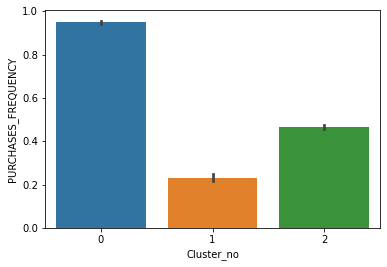

In [22]:
ax = sns.barplot(x="Cluster_no",y="PURCHASES_FREQUENCY",data=final_data)

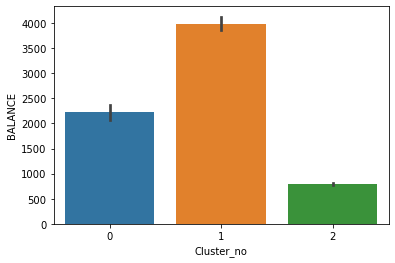

In [23]:
ax = sns.barplot(x="Cluster_no",y="BALANCE",data=final_data)

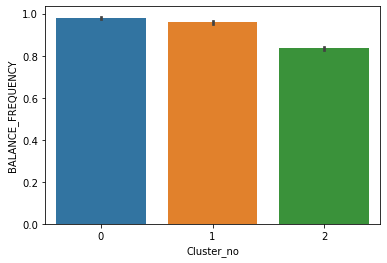

In [24]:
ax = sns.barplot(x="Cluster_no",y="BALANCE_FREQUENCY",data=final_data)

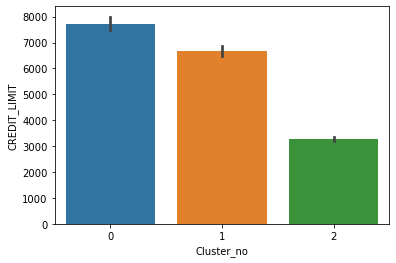

In [25]:
ax = sns.barplot(x="Cluster_no",y="CREDIT_LIMIT",data=final_data)